In [1]:
using Images

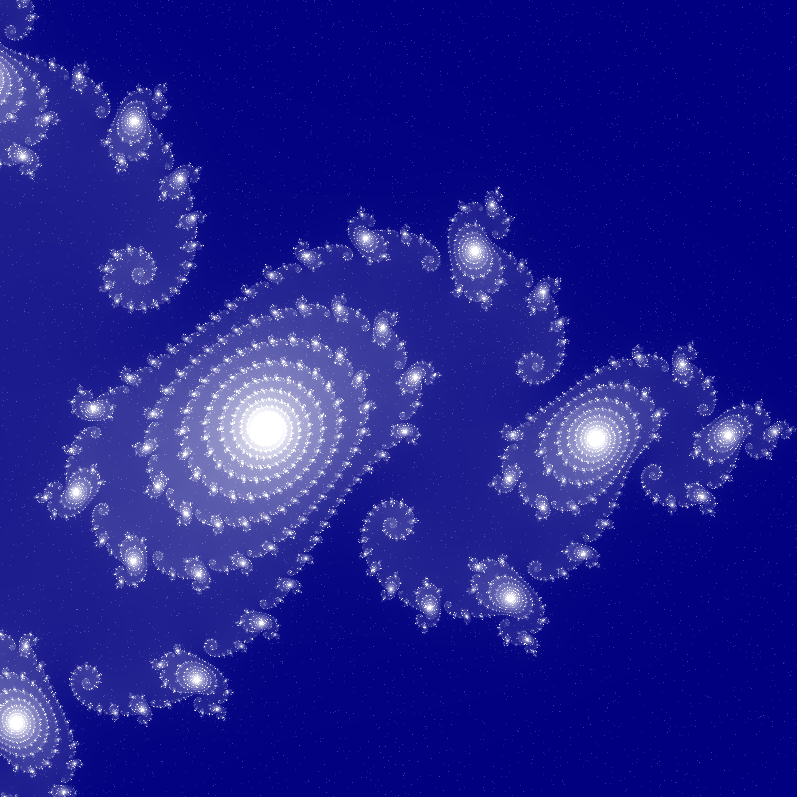

In [2]:
using FileIO
target_image = load("10th-anniversary-challenge.png")

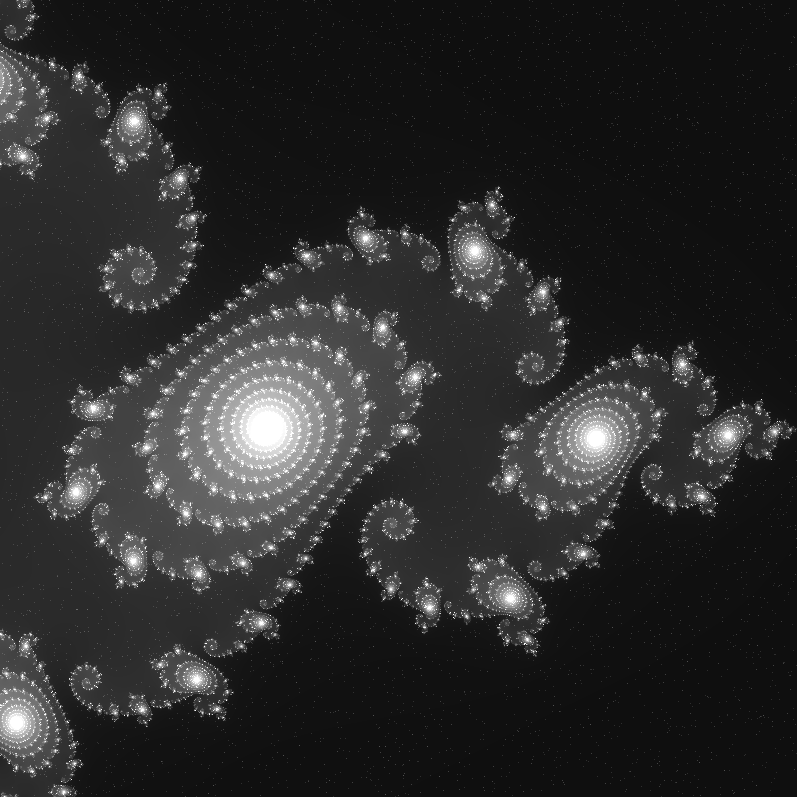

In [3]:
target_gray = Gray.(target_image)

In [4]:
function juliaset{T<:Real}(c::Complex{T}; zmax::T=2.0, ulim::Tuple{T, T}=(0.0, 1.5), vlim::Tuple{T, T}=(-0.75, 0.75), width::Int=797, height::Int=797, max_iteration::Int=1000)
    buf = Array{Float64}(width, height)

    us = linspace(ulim[1], ulim[2], width)
    vs = linspace(vlim[1], vlim[2], height)

    for x in 1:width, y in 1:height
        z = us[x] + vs[y]*im
        n = 0
        while abs(z) <= zmax && n < max_iteration
            z = z*z + c
            n += 1
        end
        buf[y, x] = n/max_iteration
    end
    return buf
end

juliaset (generic function with 1 method)

  0.009829 seconds (4.54 k allocations: 269.620 KiB)


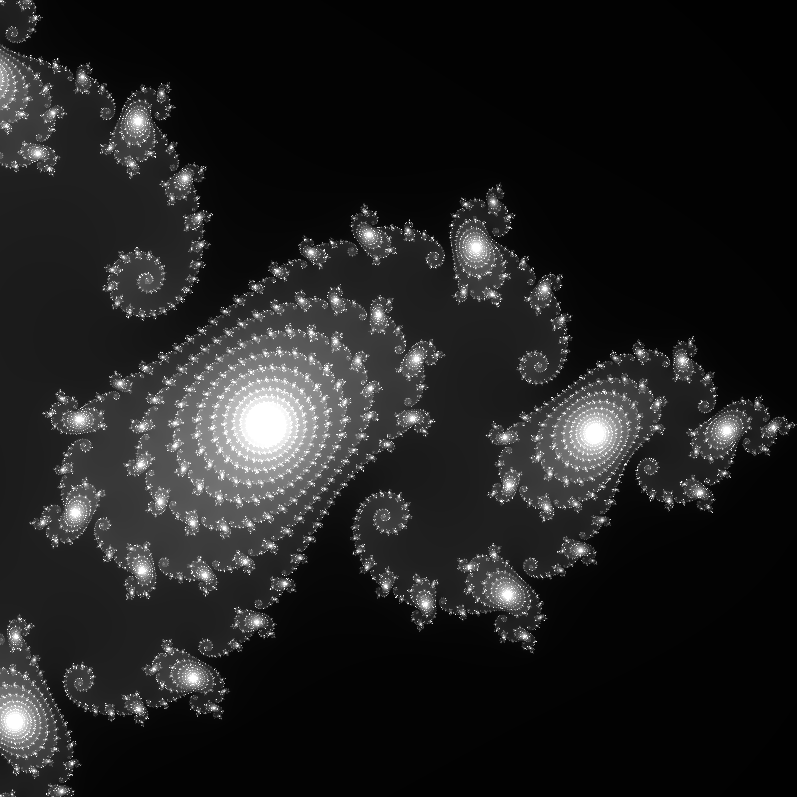

In [5]:
img = juliaset(-0.75000-0.09900im; max_iteration=300)
@time colorview(Gray, img)

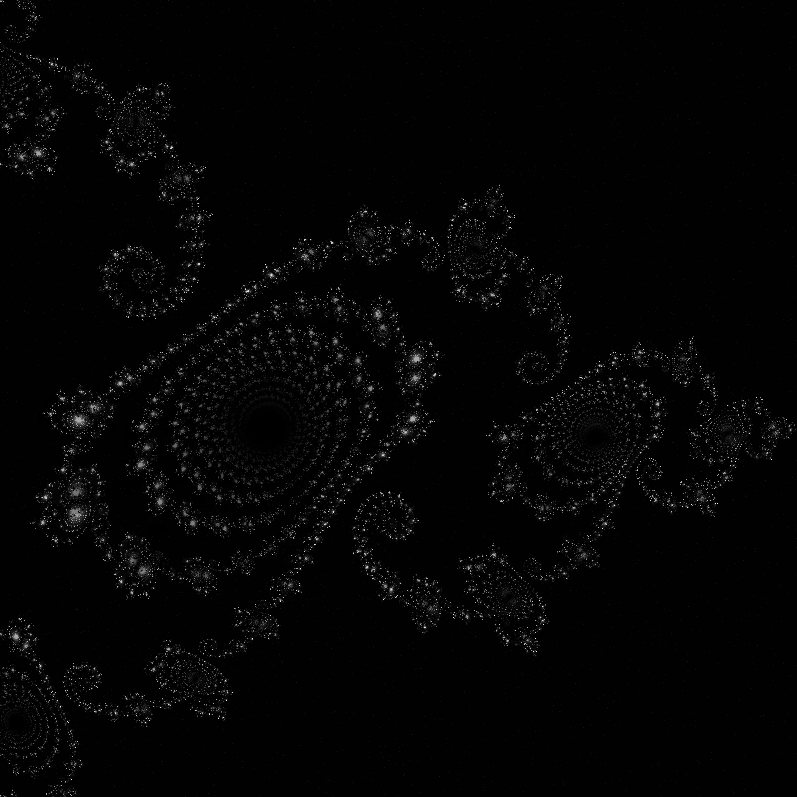

In [9]:
diff = Gray.((img - target_gray).^2)